In [1]:
import xarray as xr
import pandas as pd
import netCDF4 as nc
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.path as mpath
import matplotlib.colors as mcol
import cmocean
import numpy as np
import cftime
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
import matplotlib.path as mpath


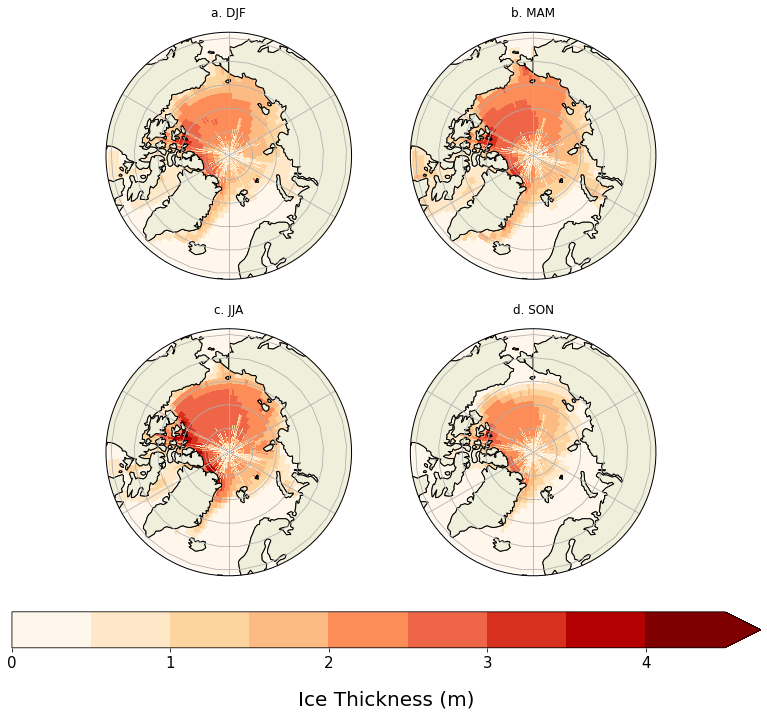

In [55]:
# Path to files

Model_mean = r'C:\Users\Asus\Desktop\Masters Project\Uncut Data\sithick\sithick_final\sithick_DJF_anomaly_regridv2.nc'
file2 = r'C:\Users\Asus\Desktop\Masters Project\Uncut Data\sithick\sithick_final\sithick_MAM_anomaly_regridv2.nc'
file3 = r'C:\Users\Asus\Desktop\Masters Project\Uncut Data\sithick\sithick_final\sithick_JJA_anomaly_regridv2.nc'
file4 = r'C:\Users\Asus\Desktop\Masters Project\Uncut Data\sithick\sithick_final\sithick_SON_anomaly_regridv2.nc'


# Open nc file into xarray dataset
dset_model_mean = xr.open_dataset(Model_mean, decode_times=True, use_cftime=True)
mean2 = xr.open_dataset(file2, decode_times=True, use_cftime=True) 
mean3 = xr.open_dataset(file3, decode_times=True, use_cftime=True) 
mean4 = xr.open_dataset(file4, decode_times=True, use_cftime=True)

# Extract data (saved as unknown) and multiply by -1 to get sea ice decrease
sithick_DJF = dset_model_mean['unknown']*(-1)
sithick_MAM = mean2['unknown']*(-1)
sithick_JJA = mean3['unknown']*(-1)
sithick_SON = mean4['unknown']*(-1)

# Change figure size
fig = plt.figure(1, figsize=[10,10])
# Define circle for projection area
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts*radius+center)

# Select colour scheme. OrRd was selected with a discrete colorbar
cmap = mpl.cm.get_cmap('OrRd', 9)

# Use cartopy and plot in LambertAzimuthal specify latitude center
# Create 4 subplots
ax = fig.add_subplot(2, 2, 1, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()

ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax2.coastlines()

ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax3.coastlines()

ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax4.coastlines()

# Transform projection onto lambert azimuthal, min at 0 and max at 4.5
cs = sithick_DJF.plot(ax=ax,transform=ccrs.PlateCarree(),vmin = 0, vmax = 4.5,cmap = cmap,add_colorbar = False)
cs2 = sithick_MAM.plot(ax=ax2,transform=ccrs.PlateCarree(),vmin = 0, vmax = 4.5,cmap = cmap,add_colorbar = False)
cs3 = sithick_JJA.plot(ax=ax3,transform=ccrs.PlateCarree(),vmin = 0, vmax = 4.5,cmap = cmap,add_colorbar = False)
cs4 = sithick_SON.plot(ax=ax4,transform=ccrs.PlateCarree(),vmin = 0, vmax = 4.5,cmap = cmap,add_colorbar = False)


# Set the gridlines and boundaries for projection, crop away outside points with no data
ax.gridlines()
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 90, 58.5], ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
ax2.gridlines()
ax2.set_boundary(circle, transform=ax2.transAxes)
ax2.set_extent([-180, 180, 90, 58.5], ccrs.PlateCarree())
ax2.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
ax3.gridlines()
ax3.set_boundary(circle, transform=ax3.transAxes)
ax3.set_extent([-180, 180, 90, 58.5], ccrs.PlateCarree())
ax3.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
ax4.gridlines()
ax4.set_boundary(circle, transform=ax4.transAxes)
ax4.set_extent([-180, 180, 90, 58.5], ccrs.PlateCarree())
ax4.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

# Title name for each subplot 
ax.set_title('a. DJF',fontsize = 12 , y = 1.04)
ax2.set_title('b. MAM',fontsize = 12 , y = 1.04)
ax3.set_title('c. JJA',fontsize = 12 , y = 1.04)
ax4.set_title('d. SON',fontsize = 12 , y = 1.04)

# Edit colour bar location
cbar_ax = fig.add_axes([0, 0.025, 1.04, 0.05])
# Set colour bar ticks
cbar = fig.colorbar(cs, cax=cbar_ax, ticks = [-4, -3, -2, -1, 0, 1, 2, 3, 4], orientation='horizontal',extend='max')
cbar.formatter.set_useOffset(False)
# Colour bar tick size
cbar.ax.tick_params(labelsize=15)
# Colour bar label
cbar.set_label('Ice Thickness (m)',fontsize = 20, x=0.5, labelpad = 20)

# Save Figure

plt.savefig('C:/Users/Asus/Desktop/Masters Project/Graphs/sithick_decrease_anomaly_seasonal_ACTUAL_6Apr.png', dpi=300, bbox_inches='tight')



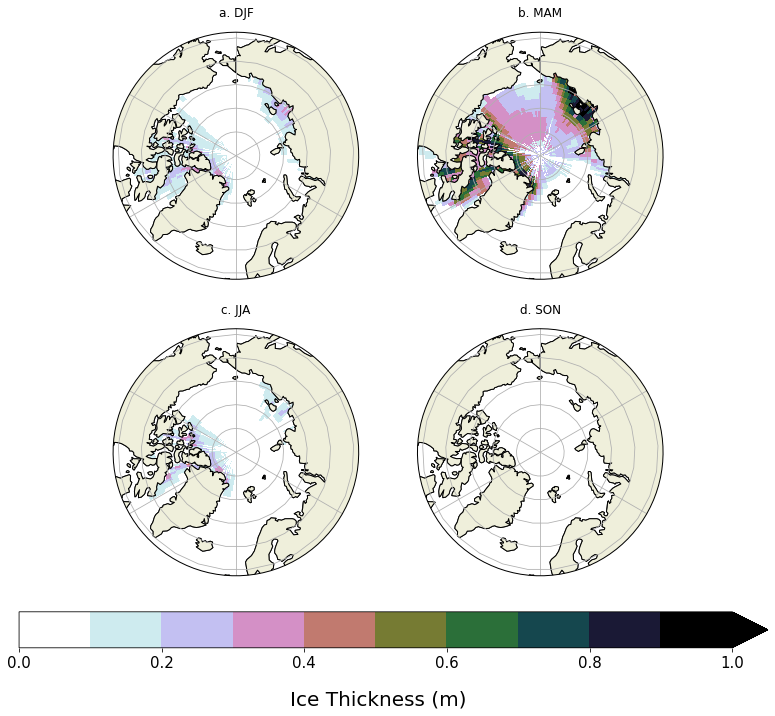

In [47]:
# Path to files

Model_mean = r'C:\Users\Asus\Desktop\Masters Project\Uncut Data\sithick\sithick_final\sithick_DJF_end-century_regrid.nc'
file2 = r'C:\Users\Asus\Desktop\Masters Project\Uncut Data\sithick\sithick_final\sithick_MAM_end-century_regrid.nc'
file3 = r'C:\Users\Asus\Desktop\Masters Project\Uncut Data\sithick\sithick_final\sithick_JJA_end-century_regrid.nc'
file4 = r'C:\Users\Asus\Desktop\Masters Project\Uncut Data\sithick\sithick_final\sithick_SON_end-century_regrid.nc'


#open nc file into xarray dataset
dset_model_mean = xr.open_dataset(Model_mean, decode_times=True, use_cftime=True)
mean2 = xr.open_dataset(file2, decode_times=True, use_cftime=True) 
mean3 = xr.open_dataset(file3, decode_times=True, use_cftime=True) 
mean4 = xr.open_dataset(file4, decode_times=True, use_cftime=True)

# Extract sithick (labelled as unknown) into arrays
sithick_DJF = dset_model_mean['unknown']
sithick_MAM = mean2['unknown']
sithick_JJA = mean3['unknown']
sithick_SON = mean4['unknown']

# Change figure size
fig = plt.figure(1, figsize=[10,10])
# Define circle for projection area
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts*radius+center)

# Define colour map and colour bar scale
cmap = mpl.cm.get_cmap('cubehelix_r', 10)

# Use cartopy and plot in LambertAzimuthal specify latitude center
# Create 4 subplots and axis
ax = fig.add_subplot(2, 2, 1, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()

ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax2.coastlines()

ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax3.coastlines()

ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax4.coastlines()

# Transform projection onto lambert azimuthal, adjust vmin, vmax accordingly
cs = sithick_DJF.plot(ax=ax,transform=ccrs.PlateCarree(),vmin = 0, vmax = 1,cmap = cmap,add_colorbar = False)
cs2 = sithick_MAM.plot(ax=ax2,transform=ccrs.PlateCarree(),vmin = 0, vmax = 1,cmap = cmap,add_colorbar = False)
cs3 = sithick_JJA.plot(ax=ax3,transform=ccrs.PlateCarree(),vmin = 0, vmax = 1,cmap = cmap,add_colorbar = False)
cs4 = sithick_SON.plot(ax=ax4,transform=ccrs.PlateCarree(),vmin = 0, vmax = 1,cmap = cmap,add_colorbar = False)


# Set the gridlines and boundaries for projection, crop away outside points with no data
ax.gridlines()
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 90, 58.5], ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
ax2.gridlines()
ax2.set_boundary(circle, transform=ax2.transAxes)
ax2.set_extent([-180, 180, 90, 58.5], ccrs.PlateCarree())
ax2.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
ax3.gridlines()
ax3.set_boundary(circle, transform=ax3.transAxes)
ax3.set_extent([-180, 180, 90, 58.5], ccrs.PlateCarree())
ax3.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
ax4.gridlines()
ax4.set_boundary(circle, transform=ax4.transAxes)
ax4.set_extent([-180, 180, 90, 58.5], ccrs.PlateCarree())
ax4.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

# Title name for each subplot
ax.set_title('a. DJF',fontsize = 12 , y = 1.04)
ax2.set_title('b. MAM',fontsize = 12 , y = 1.04)
ax3.set_title('c. JJA',fontsize = 12 , y = 1.04)
ax4.set_title('d. SON',fontsize = 12 , y = 1.04)

# Edit colour bar location
cbar_ax = fig.add_axes([0, 0.025, 1.04, 0.05])
# Colour bar ticks
cbar = fig.colorbar(cs, cax=cbar_ax, ticks = [0,0.2,0.4,0.6,0.8,1.0], orientation='horizontal',extend='max')
cbar.formatter.set_useOffset(False)
# Colour bar tick size
cbar.ax.tick_params(labelsize=15)
# Colour bar label
cbar.set_label('Ice Thickness (m)',fontsize = 20, x=0.48, labelpad = 20)

plt.savefig('C:/Users/Asus/Desktop/Masters Project/Graphs/sithick_end-of-century_6Apr.png', dpi=300, bbox_inches='tight')

